In [79]:
import pandas as pd
import numpy as np

In [2]:
LA=pd.read_excel("C:\\Users\\kavya\\Downloads\\LoanApprovalmg.xlsx")

In [3]:
LA.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y


In [4]:
LA.duplicated().sum()

0

In [5]:
LA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 62.5+ KB


In [6]:
LA.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
LA.drop(["Loan_ID"],axis=1,inplace=True)

In [8]:
LA["Loan_Status"]=LA.Loan_Status.map({"Y":1,"N":0})

In [9]:
LA.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146,360,1,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1


<Axes: xlabel='Education', ylabel='Loan_Status'>

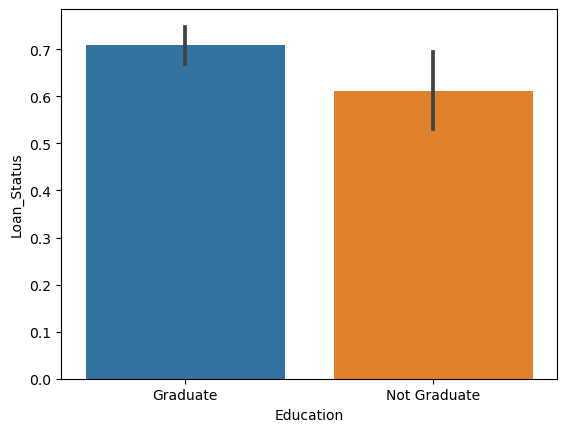

In [10]:
import seaborn as sns
sns.barplot(data=LA,x='Education',y='Loan_Status')

<Axes: xlabel='Gender', ylabel='Loan_Status'>

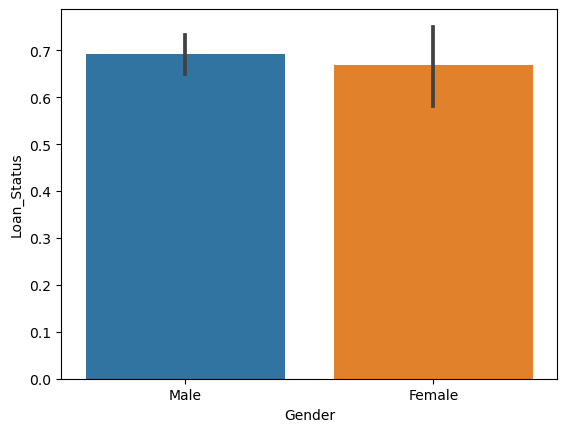

In [11]:
import seaborn as sns
sns.barplot(data=LA,x='Gender',y='Loan_Status')

In [12]:
loan_approval=pd.get_dummies(LA)

In [13]:
loan_approval.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146,360,1,1,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128,360,1,0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66,360,1,1,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120,360,1,1,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141,360,1,1,0,1,1,0,1,0,1,0,0,0,1


In [14]:
y=loan_approval.Loan_Status.values
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [15]:
loan_approval.drop("Loan_Status",axis=1,inplace=True)

In [16]:
x=loan_approval.values
x

array([[0.000e+00, 5.849e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 4.583e+03, 1.508e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 3.000e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 8.072e+03, 2.400e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.000e+00, 7.583e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 4.583e+03, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
RFC = RandomForestClassifier(random_state=0)
RFC.fit(x_train, y_train)



RandomForestClassifier(random_state=0)

In [78]:
RFC.fit(x_train, y_train)

train_score = RFC.score(x_train, y_train) 
test_score = RFC.score(x_test, y_test)

overall_score = RFC.score(x, y)

y_pred = RFC.predict(x_test)

print ("Training Accuracy: {:.2f}%".format(train_score*100)) 
print("Testing Accuracy: {:.2f}%".format(test_score*100)) 
print("Overall Accuracy: {:.2f}%".format(overall_score*100))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training Accuracy: 100.00%
Testing Accuracy: 81.30%
Overall Accuracy: 96.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.48      0.58        33
           1       0.83      0.93      0.88        90

    accuracy                           0.81       123
   macro avg       0.78      0.71      0.73       123
weighted avg       0.80      0.81      0.80       123

